In [33]:
import cv2
import numpy as np
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
#charge data mnist from keras this is a data wit images of numbers
mnist = datasets.mnist
#split data on two tuples
(x_train, y_train), (x_test, y_test)=mnist.load_data()
#normalize data down all values between 0 an 1
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)
#convert one hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [35]:
#bulding the neural network
#charge model sequential this model doesnt have any layers
model = models.Sequential()
#add first layer flatten with input shape 28x28 which represents the resolution equal to 784 neurons lined up
model.add(layers.Flatten(input_shape=(28,28)))
#add two dense layers more this is hidden layers 128 neurons
model.add(layers.Dense(units=128, activation="relu"))
model.add(layers.Dense(units=128, activation="relu"))
#add last layer dense with activation softmax
model.add(layers.Dense(units=10, activation="softmax"))

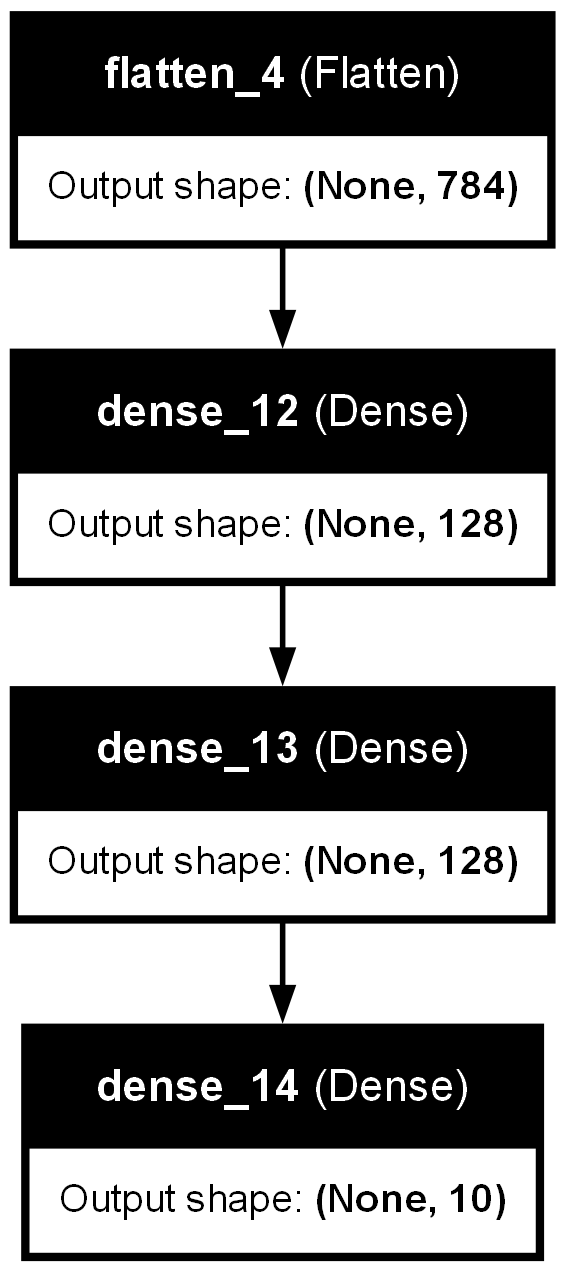

In [36]:
#this code show the layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file="image.png", show_shapes=True, show_layer_names=True)
Image(filename="image.png")

In [37]:
#compiling model
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
#train data
model.fit(x_train, y_train, epochs=5)
#test data this line evaluate loss with x_test and accuracy with y_test
loss, accuracy = model.evaluate(x_test, y_test)
#show results
print(f"the loss result is {loss*100} percent\nthe accuracy result is {accuracy*100} percent")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.8633 - loss: 0.4715
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.9661 - loss: 0.1099
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9782 - loss: 0.0694
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.9849 - loss: 0.0474
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.9878 - loss: 0.0382
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.9724 - loss: 0.0894
the loss result is 8.124462515115738 percent
the accuracy result is 97.45000004768372 percent


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


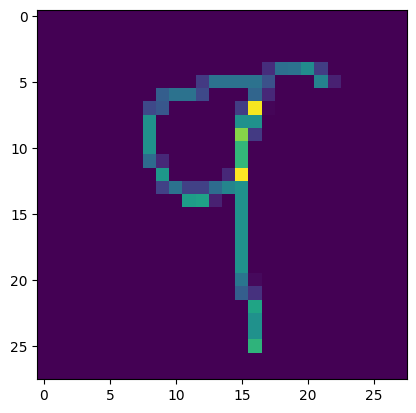

the prediction image uploaded by user is: 9


In [49]:
#predict my number 9 with cv2
pic = cv2.imread(r"9.png")[:,:,0]
#convert image to array with numpy
pic = np.invert(np.array([pic]))
#charge image to model predict
predict = model.predict(pic)
#show our image with plt
plt.imshow(pic[0])
plt.show()
#show prediction
print(f"the prediction image uploaded by user is: {np.argmax(predict)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


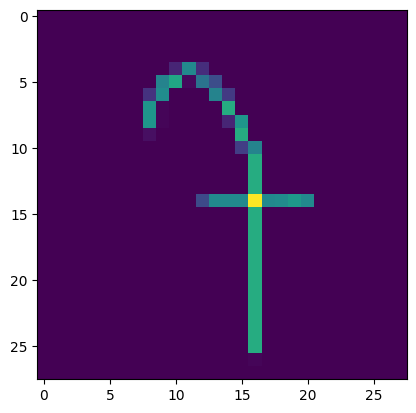

the prediction image uploaded by user is: 7


In [50]:
#predict my number 7 with cv2
pic = cv2.imread(r"7.png")[:,:,0]
#convert image to array with numpy
pic = np.invert(np.array([pic]))
#charge image to model predict
predict = model.predict(pic)
#show our image with plt
plt.imshow(pic[0])
plt.show()
#show prediction
print(f"the prediction image uploaded by user is: {np.argmax(predict)}")